In [57]:
# import libraries
from PIL import Image
import cv2
import pytesseract
from matplotlib import pyplot as plt
import numpy as np

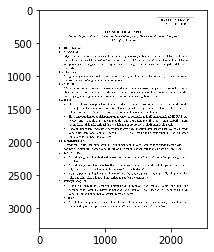

In [58]:
IMG_PATH = "img/"

img = cv2.imread(IMG_PATH + "metpen.jpg")[:,:,::-1]
plt.imshow(img)

In [59]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [60]:
gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

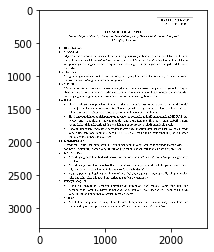

In [61]:
plt.imshow(gray, cmap='gray')

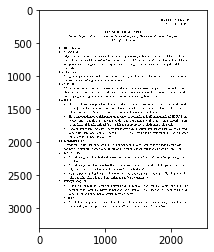

In [62]:
plt.imshow(thresh, cmap='gray')

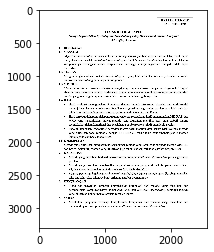

In [63]:
plt.imshow(opening, cmap='gray')

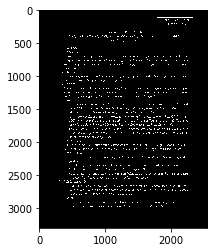

In [64]:
plt.imshow(canny, cmap='gray')

In [65]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'05111950010040\nTUGAS REVIEW PAPER\n“Image Segmentation by Histogram Thresholding using Hierarchical Cluster Analysis”\nAZ Arifin, A Asano\n1. RINGKASAN\n1.1 MASALAH\n\nAlgoritme thresholding berbasis kriteria untuk segmentasi gambar, seperti metode Otsu, tidak dapat\n\nmenyelesaikan masalah multi-level thresholding seefektif two-level thresholding karena kompleksitas\n\nkomputasinya meningkat secara eksponensial, sehingga kinerja algoritme menjadi tidak dapat\ndiandalkan.\n\n1.2 TUJUAN\nMengembangkan sebuah metode thresholding baru yang lebih efektif untuk menyelesaikan masalah\nmulti-level thresholding pada segmentasi gambar.\n\n1.3 METODE\n\nCluster hierarkis dari bawah ke atas (bottom-up) yang direpresentasikan dengan dendogram dari tingkat\n\nabu-abu pada histogram gambar berdasarkan tingkat kesamaan yang melibatkan varian antar kelas dari\n\ncluster yang akan digabung dan varian dalam kelas dari cluster gabungan baru.\n1.4 HASIL\n\ne Hasil evaluasi menggunakan 5 gambar dengan be